In [1]:
#Importing essentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize

# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size


fix ldm
use rf to find sigma of ldm

In [2]:
def obindingE(z,n):  #Oringinal Binding Energy Function
    a=z+n
    p1=  15.76   *(a)
    p2=  -17.81  *(a**(2./3.))
    p3=  -0.711  * (z**2.) * a**(-1./3.)   
    p4=  -(23.702*((z-n)**2.))/a

    if(z%2 ==0 and n%2==0):
        #print("even-even")
        p5=34.*(a**(-3./4.))
        
    elif(z%2 ==1 and n%2==1): 
        p5=-34.*(a**(-3./4.))
        #print("odd-odd")
    else: 
        p5=0
        #print("even-odd")
        
    be=p1+p2+p3+p4+p5
    return be


In [3]:
def nbindingE(Z,N):  #New Binding Energy Function
    A=Z+N
    a_v  =15.422
    a_s  =16.831
    a_c  =0.686
    a_a  =26.002
    a_as =-18.711
    a_p  = 11.199
    
    if((Z%2 ==0) and (N%2==0)):
        #print("even-even")
        n=1

    elif((Z%2 !=0) and (N%2!=0)):
        n=-1
        #print("odd-odd")
    else:
        n=0
        #print("even-odd")
    
    p_1 = a_v * A
    
    p_2 = a_s * (A**(2/3))

    p_3 = a_c * ( (Z**2)/(A**(1/3)) )
    
    p_4 = a_a + a_as/(A**(1/3))
    
    p_5 = ((A-(2*Z))**2)/A
    
    p_6 = a_p*n/(A**(1/2))
    
    
    
    B= p_1 -p_2 -p_3 -p_4 * p_5 -p_6
    
    return B
    
    

In [4]:

e_00=-342.033529
e_01=-350.396355
e_02=-361.877055
e_03=-369.809918
e_04=-380.941109
e_05=-388.355934
     
e_10=-343.116225
e_11=-354.666293
e_12=-366.804582
e_13=-376.503783
e_14=-387.831002
e_15=-396.591659

print('nbindingE')
print("20,20: ", nbindingE(20,20))
print("20,21: ", nbindingE(20,21))
print("20,22: ", nbindingE(20,22))
print("20,23: ", nbindingE(20,23))
print("20,24: ", nbindingE(20,24))
print("20,25: ", nbindingE(20,25))

print("21,20: ", nbindingE(21,20))
print("21,21: ", nbindingE(21,21))
print("21,22: ", nbindingE(21,22))
print("21,23: ", nbindingE(21,23))
print("21,24: ", nbindingE(21,24))
print("21,25: ", nbindingE(21,25), '\n')

print('obindingE')
print("20,20: ", obindingE(20,20))
print("20,21: ", obindingE(20,21))
print("20,22: ", obindingE(20,22))
print("20,23: ", obindingE(20,23))
print("20,24: ", obindingE(20,24))
print("20,25: ", obindingE(20,25))
print("21,20: ", obindingE(21,20))
print("21,21: ", obindingE(21,21))
print("21,22: ", obindingE(21,22))
print("21,23: ", obindingE(21,23))
print("21,24: ", obindingE(21,24))
print("21,25: ", obindingE(21,25), "\n")

print('nbindingE-exp')
print("20,20: ", nbindingE(20,20)+e_00)
print("20,21: ", nbindingE(20,21)+e_01)
print("20,22: ", nbindingE(20,22)+e_02)
print("20,23: ", nbindingE(20,23)+e_03)
print("20,24: ", nbindingE(20,24)+e_04)
print("20,25: ", nbindingE(20,25)+e_05)

print("21,20: ", nbindingE(21,20)+e_10)
print("21,21: ", nbindingE(21,21)+e_11)
print("21,22: ", nbindingE(21,22)+e_12)
print("21,23: ", nbindingE(21,23)+e_13)
print("21,24: ", nbindingE(21,24)+e_14)
print("21,25: ", nbindingE(21,25)+e_15, '\n')


print('obindingE-experimental')
print("20,20: ", obindingE(20,20)+e_00)
print("20,21: ", obindingE(20,21)+e_01)
print("20,22: ", obindingE(20,22)+e_02)
print("20,23: ", obindingE(20,23)+e_03)
print("20,24: ", obindingE(20,24)+e_04)
print("20,25: ", obindingE(20,25)+e_05)

print("21,20: ", obindingE(21,20)+e_10)
print("21,21: ", obindingE(21,21)+e_11)
print("21,22: ", obindingE(21,22)+e_12)
print("21,23: ", obindingE(21,23)+e_13)
print("21,24: ", obindingE(21,24)+e_14)
print("21,25: ", obindingE(21,25)+e_15, '\n')


nbindingE
20,20:  338.01766568018473
20,21:  352.0988082218689
20,22:  361.72656902548715
20,23:  373.91731497546675
20,24:  381.8548603808455
20,25:  392.38373633137553
21,20:  343.94212955597425
21,21:  359.0549596711497
21,22:  369.7330507985254
21,23:  382.9105548273208
21,24:  391.85103322693226
21,25:  403.3225375736189 

obindingE
20,20:  341.0715486854025
20,21:  351.34000024164874
20,22:  364.71196336191315
20,23:  372.9444455458018
20,24:  384.28020421422974
20,25:  390.75176901625423
21,20:  342.88606652233227
21,21:  354.4613394178424
21,22:  369.0333412525571
21,23:  378.5067942099701
21,24:  390.9835115852949
21,25:  398.63242683445867 

nbindingE-exp
20,20:  -4.015863319815253
20,21:  1.7024532218688933
20,22:  -0.15048597451283285
20,23:  4.10739697546677
20,24:  0.9137513808454969
20,25:  4.02780233137554
21,20:  0.8259045559742617
21,21:  4.388666671149679
21,22:  2.9284687985254436
21,23:  6.406771827320824
21,24:  4.020031226932247
21,25:  6.730878573618895 

obindi

In [5]:

def pair(Z, N):
    zParity = Z % 2
    nParity = N % 2
    if any(zParity) == 0 and any(nParity) == 0:
        return 1
    elif any(zParity) != 0 and any(nParity) != 0:
        return -1
    else:
        return 0

def bindea_alt(Z, N):
    A=Z+N
    
    volume = 15.75 * A
    surface = -17.8 * A ** (2 / 3)
    coulomb = -0.711 * Z ** 2 / A ** (1 / 3)
    asymmetric = -23.7 * (A - 2 * Z) ** 2 / A
    pairing = 11.18 * pair(Z, N) / A ** 0.5
    return volume + surface + coulomb + asymmetric + pairing


# Between 40^Ca and 120^U, data set: 2611

1.0 1.0 11.500863176006293
1.0 2.0 6.437624274800448
1.0 3.0 10.229076080616323
1.0 4.0 0.3871487383487846
1.0 5.0 -0.7281249348898751
1.0 6.0 -11.925371497509566
2.0 1.0 5.010686772186841
2.0 2.0 11.948425937983014
2.0 3.0 23.27920834939607
2.0 4.0 20.40524855757387
2.0 5.0 24.07462310856332
2.0 6.0 17.42755557874595
2.0 7.0 17.414510867291618
2.0 8.0 8.940688333559734
3.0 1.0 6.7718527197047935
3.0 2.0 21.273332180982045
3.0 3.0 38.13155193964678
3.0 4.0 40.819478553061884
3.0 5.0 48.601194421254085
3.0 6.0 45.999653400782705
3.0 7.0 49.06573913372994
3.0 8.0 43.64396811991144
3.0 9.0 43.893079239347855
3.0 10.0 36.791971272527334
4.0 1.0 -5.630479766893295
4.0 2.0 15.875004372090446
4.0 3.0 38.309194835986126
4.0 4.0 46.60455557874595
4.0 5.0 58.80814985968193
4.0 6.0 60.53452643269653
4.0 7.0 67.06834741464446
4.0 8.0 65.04523014912732
4.0 9.0 68.06245038821606
4.0 10.0 63.69403185400414
4.0 11.0 64.35404158525222
4.0 12.0 58.420094174069234
5.0 1.0 -9.788613305856734
5.0 2.0 16.54

43.0 62.0 900.0840041340718
43.0 63.0 907.6272197974015
43.0 64.0 912.7100399359753
43.0 65.0 919.6807582311566
43.0 66.0 924.2259381731018
43.0 67.0 930.6531652080529
43.0 68.0 934.6881579921501
43.0 69.0 940.5989336203737
43.0 70.0 944.1493353884423
43.0 71.0 949.5688985905643
43.0 72.0 952.6586039589109
43.0 73.0 957.6105417182331
43.0 74.0 960.2618837415605
43.0 75.0 964.7682653108898
43.0 76.0 967.0021417973339
43.0 77.0 971.0836400085159
43.0 78.0 972.9196277182559
44.0 41.0 681.1310320861528
44.0 42.0 695.2640652870084
44.0 43.0 711.2756719735823
44.0 44.0 724.3663847854535
44.0 45.0 739.341744333299
44.0 46.0 751.4555902096779
44.0 47.0 765.4582825689564
44.0 48.0 776.6552907569675
44.0 49.0 789.7437080236771
44.0 50.0 800.0790374824383
44.0 51.0 812.3069068609047
44.0 52.0 821.8313333903432
44.0 53.0 833.2481778346682
44.0 54.0 842.0085236510432
44.0 55.0 852.6600687093626
44.0 56.0 860.6995822693422
44.0 57.0 870.6281163448352
44.0 58.0 877.9868090317913
44.0 59.0 887.2315031

52.0 70.0 1033.4142222114065
52.0 71.0 1042.3701446903199
52.0 72.0 1049.0375807854684
52.0 73.0 1057.4536256000001
52.0 74.0 1063.609393798527
52.0 75.0 1071.5093664319675
52.0 76.0 1077.1761749454952
52.0 77.0 1084.5824751684063
52.0 78.0 1089.7816940314426
52.0 79.0 1096.7154190692165
52.0 80.0 1101.4671778966313
52.0 81.0 1107.948216595637
52.0 82.0 1112.2714938590232
52.0 83.0 1118.318612757578
52.0 84.0 1122.2313174291144
52.0 85.0 1127.8622395364828
52.0 86.0 1131.381285853034
52.0 87.0 1136.6127628496256
52.0 88.0 1139.7541388659815
52.0 89.0 1144.6020173591187
52.0 90.0 1147.3808478858093
52.0 91.0 1151.8601302862949
53.0 54.0 864.7086712830171
53.0 55.0 879.4937624875968
53.0 56.0 891.7207843464621
53.0 57.0 905.7007580771718
53.0 58.0 917.1627190319954
53.0 59.0 930.3778870729327
53.0 60.0 941.1131992140519
53.0 61.0 953.6011800499425
53.0 62.0 963.6456995909833
53.0 63.0 975.4416414926607
53.0 64.0 984.8288791777868
53.0 65.0 995.9656613675659
53.0 66.0 1004.7269723472335
5

78.0 129.0 1610.8692616906496
78.0 130.0 1614.7559595868959
79.0 90.0 1301.2736101354196
79.0 91.0 1314.0779724788504
79.0 92.0 1324.9248869356882
79.0 93.0 1337.2490048869086
79.0 94.0 1347.633530200599
79.0 95.0 1359.4929935880846
79.0 96.0 1369.4302034463951
79.0 97.0 1380.8399232536005
79.0 98.0 1390.3442361189138
79.0 99.0 1401.318481332785
79.0 100.0 1410.4036958821953
79.0 101.0 1420.9561279558511
79.0 102.0 1429.635456236466
79.0 103.0 1439.7791613449178
79.0 104.0 1448.0652598148656
79.0 105.0 1457.8127790674337
79.0 106.0 1465.7177776786416
79.0 107.0 1475.0811354379837
79.0 108.0 1482.6166649037582
79.0 109.0 1491.6073953489488
79.0 110.0 1498.7846127275393
79.0 111.0 1507.4137847873326
79.0 112.0 1514.243397501908
79.0 113.0 1522.5216382740384
79.0 114.0 1529.0139266797578
79.0 115.0 1536.9514434428065
79.0 116.0 1543.1162820427696
79.0 117.0 1550.7228829586065
79.0 118.0 1556.5697603623885
79.0 119.0 1563.854873959472
79.0 120.0 1569.3929116705854
79.0 121.0 1576.365605191

No handles with labels found to put in legend.


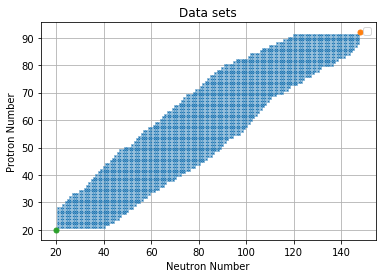

In [6]:
y_the=[]
N_exp = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=3)#, skip_header=350, skip_footer=3433-2953) #Number of neutrons
Z_exp = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=4)#, skip_header=350, skip_footer=3433-2953) #Number of protons
X_exp = np.transpose(np.stack((Z_exp,N_exp)))
A_exp = N_exp+Z_exp # Total number of Nucleons

# Difference between the experimental binding energy and the Liquid drop model
y_exp = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=5)#, skip_header=350, skip_footer=3433-2953)


for X_exp_i in X_exp:
    y_the.append(nbindingE(X_exp_i[0], X_exp_i[1]))
    print(X_exp_i[0], X_exp_i[1], nbindingE(X_exp_i[0], X_exp_i[1]))

the_exp_diff=y_the-y_exp

ZN_exp=np.transpose(np.stack((Z_exp, N_exp, the_exp_diff, y_exp, y_the)))
Z_aug=[]
N_aug=[]

the_exp_diff_aug=[]

y_exp_aug=[]
y_the_aug=[]

for ZN_i in ZN_exp:
    if (ZN_i[0]>20) and (ZN_i[0]<92):
        if (ZN_i[1]>20) and (ZN_i[1]<240-92):
            #if (ZN_i[0]+ZN_i[1]>40) and (ZN_i[0]+ZN_i[1]<240):
            Z_aug.append(ZN_i[0])
            N_aug.append(ZN_i[1])
            the_exp_diff_aug.append(ZN_i[2])
            y_exp_aug.append(ZN_i[3])
            y_the_aug.append(ZN_i[4])
        

print(len(y_the), len(Z_exp))
print("data sets:", len(y_the_aug), len(y_exp_aug))
plt.title('Data sets')
plt.plot(N_aug, Z_aug,  'x', markersize=2, label="_aug")
#plt.plot(N_exp, Z_exp,  'x', markersize=2, label="_exp")
plt.plot(240-92, 92,  'o',   markersize=5, label="_aug")
plt.plot(40-20, 20,  'o',   markersize=5, label="_aug")

plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.legend()
plt.grid(True)
plt.show()




In [7]:
def ki(exp_the):
    ki_2=0
    
    #print(exp_the[0], "\n\n")
    
    
    for exp_the_i in exp_the:
        ki_2=ki_2+(exp_the_i[0]-exp_the_i[1])**2
        #print(exp_the_i[0],exp_the_i[1])
    
    #print(len(exp_the)) 
    return np.sqrt(ki_2/(len(exp_the)))

In [8]:
from sklearn.metrics import mean_squared_error
y_exp_the_aug=np.transpose(np.stack((y_exp_aug, y_the_aug)))
y_train, y_test = train_test_split( y_exp_the_aug, test_size =0.25, random_state=42 )



print("all augmented:             ", ki(y_exp_the_aug))
y_exp_the_aug=np.transpose(y_exp_the_aug)
y_exp_the=np.transpose(np.stack((y_exp,y_the)))
print("Mean Squared Error of all: ", np.sqrt(mean_squared_error(y_exp_the_aug[0],y_exp_the_aug[1])), "\n")



print("trained:                       ", ki(y_train))
y_train=np.transpose(y_train)
print("Mean Squared Error of trained: ", np.sqrt(mean_squared_error(y_train[0],y_train[1])), "\n")



print("test:                         ", ki(y_test))
y_test=np.transpose(y_test)
print("Mean Squared Error of tested: ", np.sqrt(mean_squared_error(y_test[0],y_test[1])), "\n")

all augmented:              3.3545962294547187
Mean Squared Error of all:  3.3545962294547205 

trained:                        3.372182767931375
Mean Squared Error of trained:  3.3721827679313754 

test:                          3.3013019787209337
Mean Squared Error of tested:  3.3013019787209363 



# Region Z>20, Z<50, data set: 1978

No handles with labels found to put in legend.


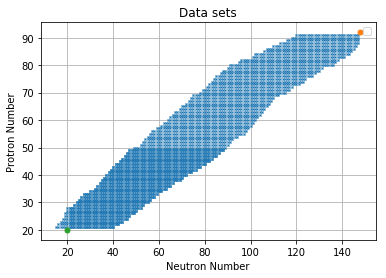

In [9]:
def nbindingE(Z,N):  #New Binding Energy Function
    A=Z+N
    a_v  =15.422
    a_s  =16.831
    a_c  =0.686
    a_a  =26.002
    a_as =-18.711
    a_p  = 11.199
    
    if((Z%2 ==0) and (N%2==0)):
        #print("even-even")
        n=1

    elif((Z%2 !=0) and (N%2!=0)):
        n=-1
        #print("odd-odd")
    else:
        n=0
        #print("even-odd")
    
    p_1 = a_v * A
    
    p_2 = a_s * (A**(2/3))

    p_3 = a_c * ( (Z**2)/(A**(1/3)) )
    
    p_4 = a_a + a_s/(A**(1/3))
    
    p_5 = ((A-(2*Z))**2)/A
    
    p_6 = a_p*n/(A**(1/2))
    
    
    
    B= p_1 -p_2 -p_3 -p_4 * p_5 -p_6
    
    return B
for ZN_i in ZN_exp:
    if (ZN_i[0]>20) and (ZN_i[0]<50):
        #if (ZN_i[1]>=20) and (ZN_i[1]<=240-92):
            #if (ZN_i[0]+ZN_i[1]>40) and (ZN_i[0]+ZN_i[1]<240):
            Z_aug.append(ZN_i[0])
            N_aug.append(ZN_i[1])
            the_exp_diff_aug.append(ZN_i[2])
            y_exp_aug.append(ZN_i[3])
            y_the_aug.append(ZN_i[4])
        

        
plt.title('Data sets')
plt.plot(N_aug, Z_aug,  'x', markersize=2, label="_aug")
#plt.plot(N_exp, Z_exp,  'x', markersize=2, label="_exp")
plt.plot(240-92, 92,  'o',   markersize=5, label="_aug")
plt.plot(40-20, 20,  'o',   markersize=5, label="_aug")

plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.legend()
plt.grid(True)
plt.show()


In [10]:

y_exp_the=np.transpose(np.stack((y_exp,y_the)))

print("All: ", ki(y_exp_the),"\n")



y_exp_the_aug=np.transpose(np.stack((y_exp_aug, y_the_aug)))


y_train, y_test = train_test_split( y_exp_the_aug, test_size =0.25, random_state=42 )


print("All augmented:             ", ki(y_exp_the_aug))
y_exp_the_aug=np.transpose(y_exp_the_aug)
print("Mean Squared Error of all: ", np.sqrt(mean_squared_error(y_exp_the_aug[0],y_exp_the_aug[1])), "\n")


print("trained:                       ", ki(y_train))
y_train=np.transpose(y_train)
print("Mean Squared Error of trained: ", np.sqrt(mean_squared_error(y_train[0],y_train[1])), "\n")

print("test:                         ", ki(y_test))
y_test=np.transpose(y_test)
print("Mean Squared Error of tested: ", np.sqrt(mean_squared_error(y_test[0],y_test[1])), "\n")


All:  3.9737323941829716 

All augmented:              3.3970642858073017
Mean Squared Error of all:  3.397064285807301 

trained:                        3.3562582635550564
Mean Squared Error of trained:  3.3562582635550604 

test:                          3.5166424971249155
Mean Squared Error of tested:  3.5166424971249173 

